Women-jacket > balenciaga | comparison btw 11b and 90b

###Dependencies

In [ ]:
!pip install -U transformers bitsandbytes accelerate --q
!pip install python-Levenshtein --q
!pip install pillow-avif-plugin --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import numpy as np
import pandas as pd
import requests
from PIL import Image
from pathlib import Path
import urllib
from imageio import imread
import requests
from io import BytesIO
import glob
import torch
from transformers import AutoProcessor, AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig, MllamaForConditionalGeneration, PaliGemmaForConditionalGeneration, AutoModelForZeroShotImageClassification
from unittest.mock import patch
from transformers import pipeline
from transformers.dynamic_module_utils import get_imports
from PIL import Image, ImageDraw, ImageFont
from itertools import cycle
import numpy as np
import pandas as pd
import os
import getpass
from tqdm import tqdm
from Levenshtein import ratio, distance
from itertools import combinations
import torch
from tqdm import tqdm

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

###LLama Model (11b Quantized)

In [ ]:
class LLaMAModel:
    def __init__(self, model_id="meta-llama/Llama-3.2-11B-Vision-Instruct"):
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.model_id = model_id
        self.model = MllamaForConditionalGeneration.from_pretrained(
            model_id,
            quantization_config=quantization_config,
            # torch_dtype=torch.bfloat16,
            device_map="auto",
        ).eval()
        self.processor = AutoProcessor.from_pretrained(model_id)

    def run_example(self, task_prompt: str, image: Image, **kwargs):
        messages = [
            {"role": "user", "content": [
                {"type": "image"},
                {"type": "text", "text": task_prompt}
            ]}
        ]
        input_text = self.processor.apply_chat_template(messages, add_generation_prompt=True)
        inputs = self.processor(
            image,
            input_text,
            add_special_tokens=False,
            return_tensors="pt"
        ).to(self.model.device, self.model.dtype)

        output = self.model.generate(**inputs, max_new_tokens=25, **kwargs)
        generated_text = self.processor.decode(output[0], skip_special_tokens=True)
        logo_name = generated_text.strip().split('assistant')[-1].strip().strip('.')
        return logo_name

    def run_examples(self, prompts, image, repetitions=1, **kwargs):
        results = [{'prompt': prompt,
                    'answer': self.run_example(prompt, image, **kwargs)}
                   for prompt in prompts for _ in range(repetitions)]
        results_df = pd.DataFrame(results)
        results_df['yes'] = results_df['answer'].str.lower().str.contains('yes')
        results_df['no'] = results_df['answer'].str.lower().str.contains('no')
        results_df['include'] = (results_df['yes'] | results_df['no'])
        return results_df

    def get_logo_name(self, image: Image):
        prompt = "Detect the logo in the clothing. What is the full brand name of this logo? Only give the brand name (no special characters or extra words)"
        return self.run_example(prompt, image=image)

In [ ]:
os.environ["HF_TOKEN"] = getpass.getpass()

KeyboardInterrupt: Interrupted by user

In [ ]:
llama_model = LLaMAModel()

config.json:   0%|          | 0.00/5.07k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/89.4k [00:00<?, ?B/s]

model-00001-of-00005.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00005.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00003-of-00005.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00005.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00005-of-00005.safetensors:   0%|          | 0.00/1.47G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

###Image testing

In [ ]:
# image_1 = Image.open(phase1_path/"output/17_69.png")
from google.colab import files
import pillow_avif
from PIL import Image
# Prompt to upload your image file(s) from your local machine
uploaded = files.upload()

# Assuming one image is uploaded, get its filename
file_name = list(uploaded.keys())[0]

# Open the uploaded image
img = Image.open(file_name)

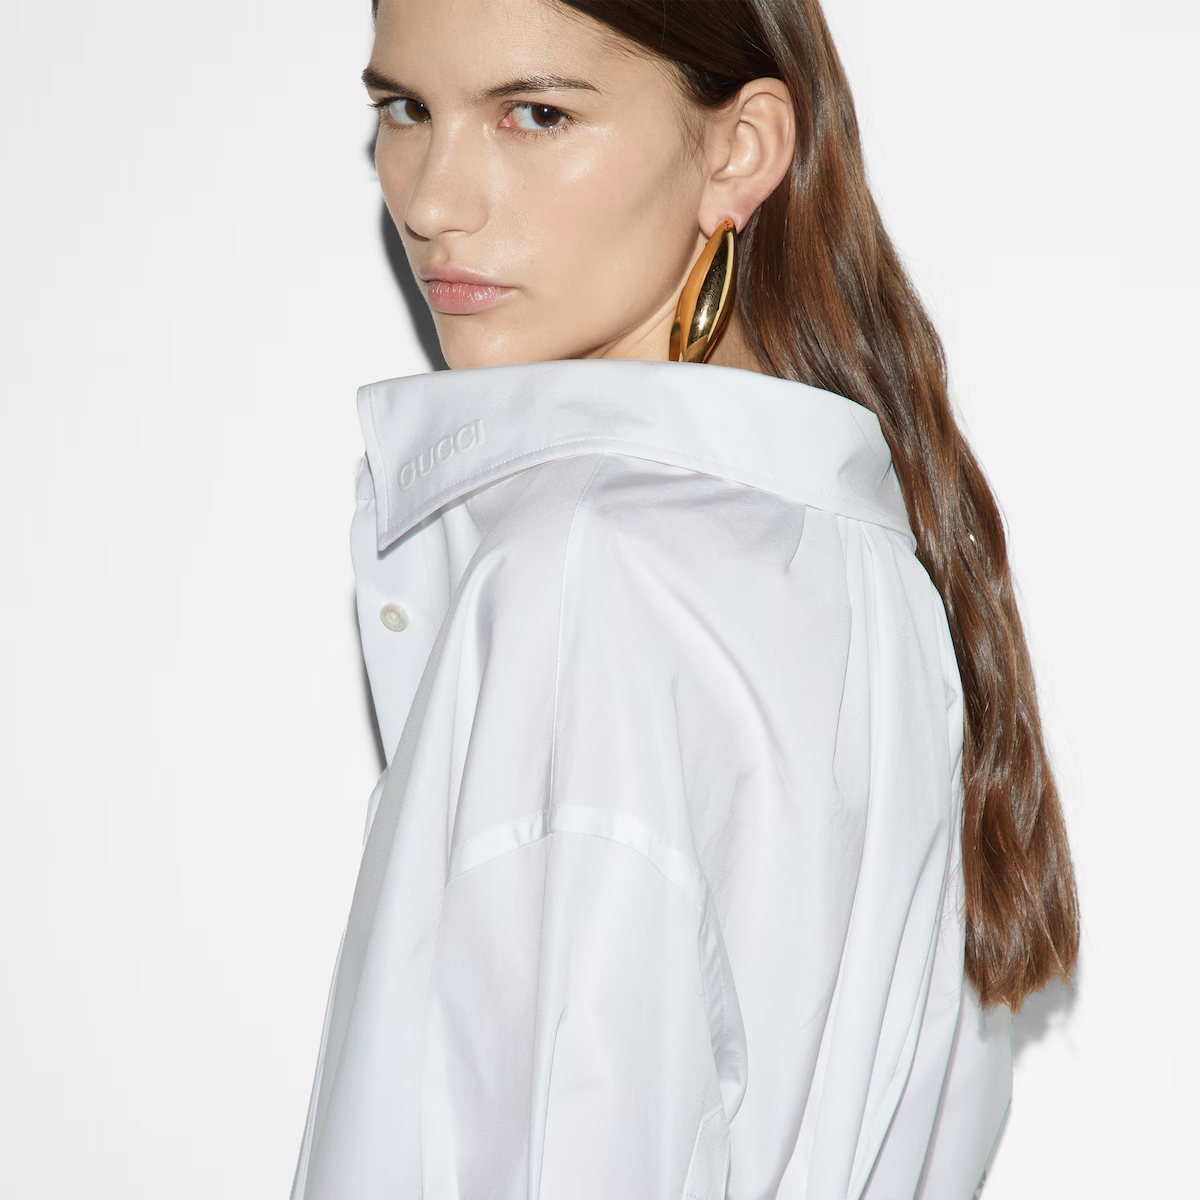

In [ ]:
img

####Garments And Colors

In [ ]:
llama_model.run_example(
    "Analyze the image and list every garment worn by the model, along with its predominant color(s)."
    "Return response in json format"
    # "{Garment type: Color(s), }"
    "Example format: {shirt: white , jeans: grey,..}"
    "Strictly dont return any other information other than format defined! Give the response like example defined",
    img,
)

'{trousers: black, cardigan: black and white, shirt: white}'

####Brand/ Designer

In [ ]:
# # Define the allowed fashion designers
# allowed_brands = ["Louis Vuitton", "Prada", "Hermès", "Balenciaga", "Dior", "Saint Laurent",
#                   "Fendi", "Burberry", "Versace", "Givenchy", "Valentino", "Dolce & Gabbana", "Armani",
#                   "Bottega Veneta", "Alexander McQueen", "Celine", "Loewe", "Off-White", "Supreme", "Off-White",
#                   "A Bathing Ape (BAPE)", "Palace", "Fear of God", "Kith", "Noah", "Vetements",
#                   "Yeezy (formerly by Kanye West)", "Billionaire Boys Club", "Ambush", "A-Cold-Wall",
#                   "Heron Preston", "Carhartt WIP", "Stone Island", "Comme des Garçons", "Undercover", "WTAPS",
#                   "Neighborhood", "Nike", "Adidas", "Puma", "Under Armour", "Lululemon", "Stüssy", "Reebok", "Fila", "New Balance",
#                   "ASICS", "The North Face", "Patagonia", "Columbia Sportswear", "Champion", "Athleta", "Gymshark",
#                   "Sweaty Betty", "Outdoor Voices", "Salomon", "Arc'teryx", "On Running", "Zara", "H&M", "Uniqlo",
#                   "Forever 21", "Gap", "Old Navy", "Gucci", "Primark", "Topshop", "ASOS", "Boohoo", "Shein", "Fashion Nova",
#                   "Mango", "Pull & Bear", "Bershka", "Urban Outfitters", "American Eagle", "Hollister", "Chanel",
#                   "Abercrombie & Fitch", "Cotton On", "Levi’s", "Wrangler", "Diesel", "Lee", "Guess", "Tommy Hilfiger",
#                   "Calvin Klein", "Ralph Lauren", "G-Star Raw", "True Religion", "7 For All Mankind", "Lucky Brand", "AG Jeans",
#                   "Citizens of Humanity", "Hudson Jeans", "Joe’s Jeans", "Paige Denim", "Nudie Jeans", "Edwin", "Re/Done"]

# # # Create a comma-separated string of allowed patterns
# # brands_str = ", ".join(allowed_brands)

# # # Construct the query so that only the specified patterns are considered
# # # query = (
# # #     f"Tell me the fashion Fashion brand/designer/logo on the outfit from the following list: {allowed_brands}. "
# # #     "If you cant identify then search for any letters or writing anywhere on the outfit"
# # #     "Look at the collar and then return the text"
# # #     "Just return the text No extra information is needed from your side"
# # # )

# # Construct the query so that only the specified patterns are considered
# query = (
#     f"Analyze the image and identify the fashion brands/logos/designers on the outfit from the following list: {allowed_brands}. "
#     "List only the garments worn by the model having fashion brands/logos/designers. Strictly dont mention plain garments!"
#     "Return response in json format like the following example:"
#     # "{Garment type: brand(s), }"
#     "{Jacket: Gucci, shirt: None, jeans: prada..}"
#     "If you cant identify the brand name on any garment, then only return 'No brand' in json format."
#     "No extra information or comments needed besides the json format"
# )


# # Run the model with the modified query
# result_brand = llama_model.run_example(query, img)

# print(result_brand)

I can't confidently identify the brands on the garments in the image


In [ ]:
# import random

# allowed_brands = random.shuffle(allowed_brands)
# print(allowed_brands)

None


In [ ]:
# allowed_brands = random.shuffle(allowed_brands)
#Here is how you can run ONE single prompt on the image using the run_example function
query = (
    f"Analyze the image and tell me the Fashion logo/brand/designer/ on the garment "
    # f"Identify the fashion pattern on the outfit from the following list: {allowed_brands}. from the following list: {allowed_brands}""
    "Return response in json format"
    # "{Garment type: Pattern, }"
    "Example format: {Designer: Gucci, Pradda..}"
    "Return {Designer: None} if you cant find any brand on any garment"
    "Strictly dont return any other information other than the defined format! Only return a JSON format as described"
)

llama_model.run_example(query,img)

'{Designer: None}'

In [ ]:
#Here is how you can run ONE single prompt on the image using the run_example function
llama_model.run_example("Tell me the Fashion brand/designer/logo on the outfit. Just return the name. No extra information",
                        img)

'Moschino'

####Patterns

In [ ]:
# Define the allowed fashion patterns
allowed_patterns = [
    "Houndstooth", "Herringbone", "Chevron", "Paisley", "Plaid (Tartan)", "Gingham", "Argyle",
    "Polka Dots", "Stripes (Vertical, Horizontal, Diagonal)", "Pin Stripes", "Windowpane", "Tattersall",
    "Buffalo Check", "Madras","Seersucker","Moroccan Tile Patterns","Greek Key","Zigzag",
    "Diamond Patterns","Kaleidoscope Patterns","Leopard Print","Zebra Print","Tiger Print","Snake Print",
    "Giraffe Print","Cheetah Print","Aztec Patterns","Graffiti Prints","Cubist Patterns","Camouflage"
]

# Create a comma-separated string of allowed patterns
patterns_str = ", ".join(allowed_patterns)

# Construct the query so that only the specified patterns are considered
query = (
    "Analyze the image and ONLY list garments worn by the model having some fashion pattern."
    f"Identify the fashion pattern on the outfit from the following list: {patterns_str}. "
    "Return response in json format."
    # "{Garment type: Pattern, }"
    "Example format: {shirt: Chevron, skirt: plaid,..}"
    "Return {pattern: None} if you cant find any pattern"
    "Strictly dont return any other information other than format defined! Give the response like example defined",
)

# Run the model with the modified query
result_pattern = llama_model.run_example(query, img)

print(result_pattern)

{pattern: None}


### Groq Testing (Llama 90b )

In [ ]:
!pip install groq --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.2/122.2 kB 4.7 MB/s eta 0:00:00


In [ ]:
allowed_brands = ["Louis Vuitton", "Prada", "Hermès",  "Dior", "Saint Laurent",
                  "Fendi", "Burberry", "Versace", "Givenchy", "Valentino", "Dolce & Gabbana", "Balenciaga","Armani",
                  "Bottega Veneta", "Alexander McQueen", "Celine", "Loewe", "Off-White", "Supreme",
                  "A Bathing Ape (BAPE)", "Palace", "Fear of God", "Kith", "Noah", "Vetements",
                  "Yeezy (formerly by Kanye West)", "Billionaire Boys Club", "Ambush", "A-Cold-Wall",
                  "Heron Preston", "Carhartt WIP", "Stone Island", "Comme des Garçons", "Undercover", "WTAPS",
                  "Neighborhood", "Nike", "Adidas", "Puma", "Under Armour", "Lululemon", "Stüssy", "Reebok", "Fila", "New Balance",
                  "ASICS", "The North Face", "Patagonia", "Columbia Sportswear", "Champion", "Athleta", "Gymshark",
                  "Sweaty Betty", "Outdoor Voices", "Salomon", "Arc'teryx", "On Running", "Zara", "H&M", "Uniqlo",
                  "Forever 21", "Gap", "Old Navy", "Gucci", "Primark", "Topshop", "ASOS", "Boohoo", "Shein", "Fashion Nova",
                  "Mango", "Pull & Bear", "Bershka", "Urban Outfitters", "American Eagle", "Hollister", "Chanel",
                  "Abercrombie & Fitch", "Cotton On", "Levi’s", "Wrangler", "Diesel", "Lee", "Guess", "Tommy Hilfiger",
                  "Calvin Klein", "Ralph Lauren", "G-Star Raw", "True Religion", "7 For All Mankind", "Lucky Brand", "AG Jeans",
                  "Citizens of Humanity", "Hudson Jeans", "Joe’s Jeans", "Paige Denim", "Nudie Jeans", "Edwin", "Re/Done"]


Saving 806250_XJG3G_4003_002_100_0000_Light-Embroidered-cotton-piquet-polo-shirt.avif to 806250_XJG3G_4003_002_100_0000_Light-Embroidered-cotton-piquet-polo-shirt (1).avif


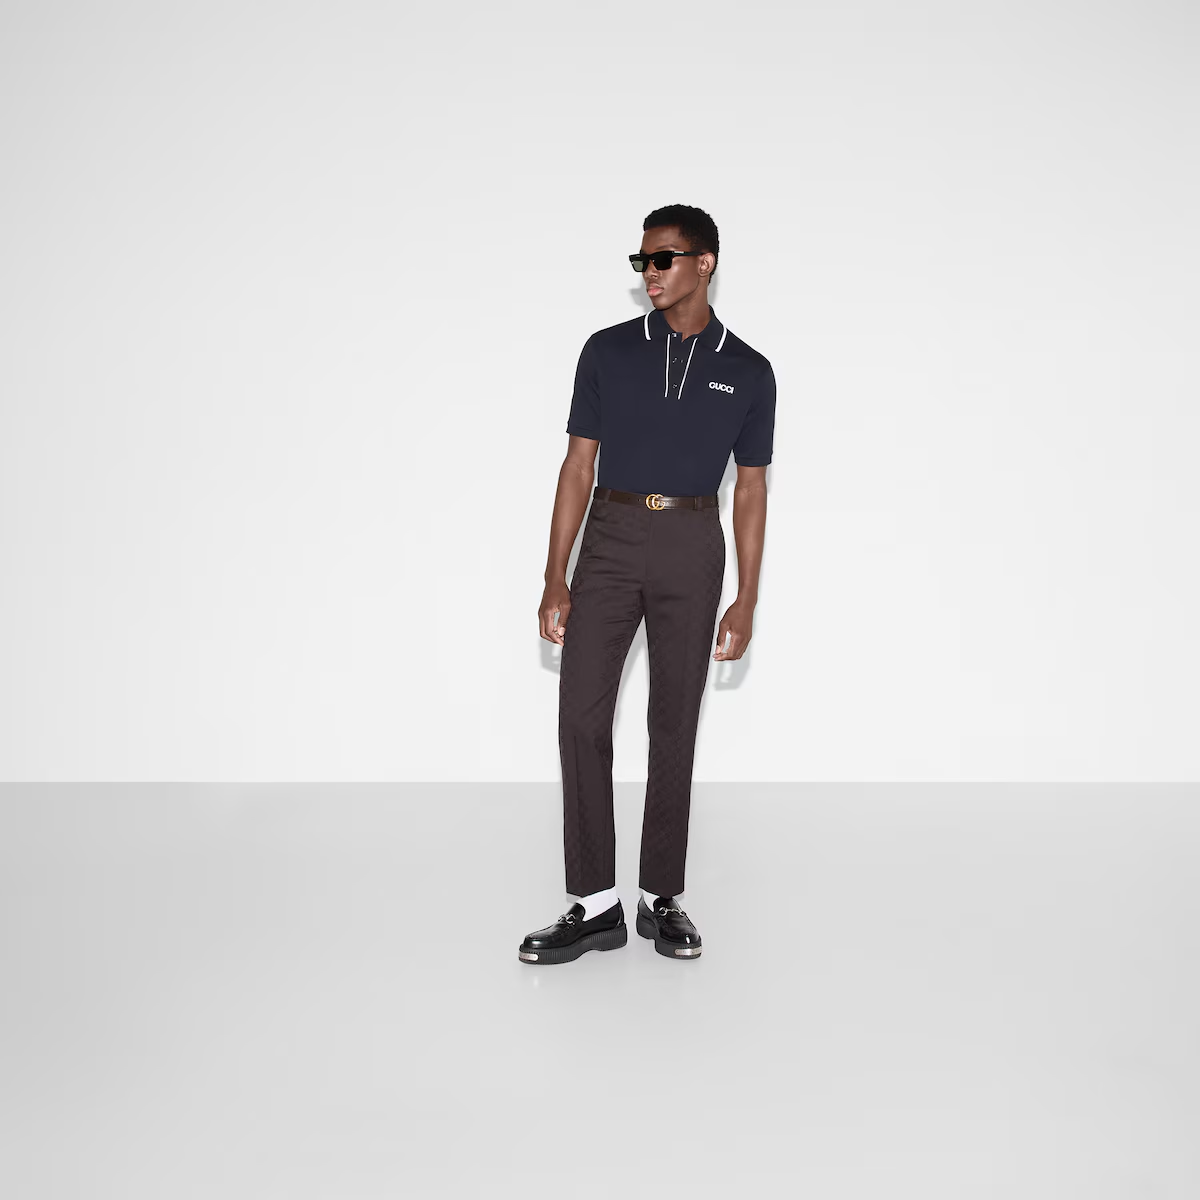

In [ ]:
# Upload your image file
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
img = Image.open(file_name)
img

In [ ]:
# Import necessary packages
import os
from google.colab import files
from PIL import Image
import base64
from io import BytesIO

# Set the GROQ API key
os.environ["GROQ_API_KEY"] = "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"

# Convert to base64
buffered = BytesIO()
img.save(buffered, format="PNG")
img_b64 = base64.b64encode(buffered.getvalue()).decode("utf-8")

from groq import Groq
client = Groq(api_key="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")

# Modified request using image_url format with data URI
completion = client.chat.completions.create(
    model="llama-3.2-90b-vision-preview",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": (
                        f"Analyze the image and tell me the Fashion logo/brand/designer/ on the garment "
                          # f"Identify the fashion pattern on the outfit from the following list: {allowed_brands}. from the following list: {allowed_brands}""
                          "Return response in json format"
                          # "{Garment type: Pattern, }"
                          "Example format: {Designer: Gucci, Pradda..}"
                          "Return {Designer: None} if you cant find any brand on any garment"
                          "Strictly dont return any other information other than the defined format! Only return a JSON format as described"
                        # f"Analyze the image and tell me the Fashion logo/brand/designer on the garment. "
                        # f"Check for any symbols or single letters on garments for brand name prediction. "
                        # # f"Only return the logo name if it matches one of the following allowed brands: {allowed_brands}. "
                        # f"Return the response in JSON format. "
                        # f"Example format: {{'Designer': 'Gucci'}}. "
                        # f"Return {{'Designer': null}} if you can't predict any brand on the garment or if you are not confident in your answer."
                        # f"Strictly do not return any other information other than the defined example format!"
                    )
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/png;base64,{img_b64}"
                    }
                }
            ]
        }
    ],
    temperature=0,
    max_tokens=8192,
    top_p=1,
    stream=False,
    response_format={"type": "json_object"}
)

# Print the JSON response
print(completion.choices[0].message)

ChatCompletionMessage(content='{\n   "Designer": "Fendi"\n}', role='assistant', function_call=None, reasoning=None, tool_calls=None)


## Paligemma

In [ ]:
class PaligemmaModel:
    def __init__(self, model_id="google/paligemma-3b-mix-224"):
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.model_id = model_id
        self.model = PaliGemmaForConditionalGeneration.from_pretrained(
            model_id, quantization_config=quantization_config).eval()
        self.processor = AutoProcessor.from_pretrained(model_id)

    def run_example(self, image, prompt=None):
        if prompt:
            prompt = f"<image>{prompt}<bos>"
        if not prompt:
            prompt = "<image>What outfits is the model wearing in the image? And what are the colors of those outfits respectively?<bos>"

        # print(prompt)
        model_inputs = self.processor(text=prompt, images=image, return_tensors="pt").to(self.device, self.model.dtype)
        input_len = model_inputs["input_ids"].shape[-1]

        with torch.inference_mode():
            generation = self.model.generate(**model_inputs, max_new_tokens=128, do_sample=False, early_stopping=False, num_beams=3)
            generation = generation[0][input_len:]
            decoded = self.processor.decode(generation, skip_special_tokens=True)

        # print(decoded)
        return decoded

    def run_examples(self, images, prompts=None):
        if prompts:
            prompts = [f"<image>{prompt}<bos>" for prompt in prompts]
        if not prompts:
            print("No prompts given")
            return

        assert len(images) == len(prompts)

        # print(prompt)
        model_inputs = self.processor(text=prompts, images=images, return_tensors="pt").to(self.device, self.model.dtype)
        # print(model_inputs)
        input_len = model_inputs["input_ids"].shape[-1]

        with torch.inference_mode():
            generation = self.model.generate(**model_inputs, max_new_tokens=30, do_sample=False, early_stopping=False, num_beams=1, temperature=0.1)
            # print(generation)
            generation = generation[:, input_len:]
            decoded = self.processor.batch_decode(generation, skip_special_tokens=True)

        # print(decoded)
        return decoded

    def verify_image(self, image, prompt=None):
            result = self.run_example(image, prompt)
            if 'logo' in str.lower(result):
                return True
            return False

    def verify_images(self, images):
        results = [image for image in images if self.run_example(image)]
        return results

In [ ]:
pg_model = PaligemmaModel()

`low_cpu_mem_usage` was None, now default to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Saving 796395_XJG3P_4735_007_100_0000_Light-Cotton-jersey-T-shirt-with-print.avif to 796395_XJG3P_4735_007_100_0000_Light-Cotton-jersey-T-shirt-with-print.avif


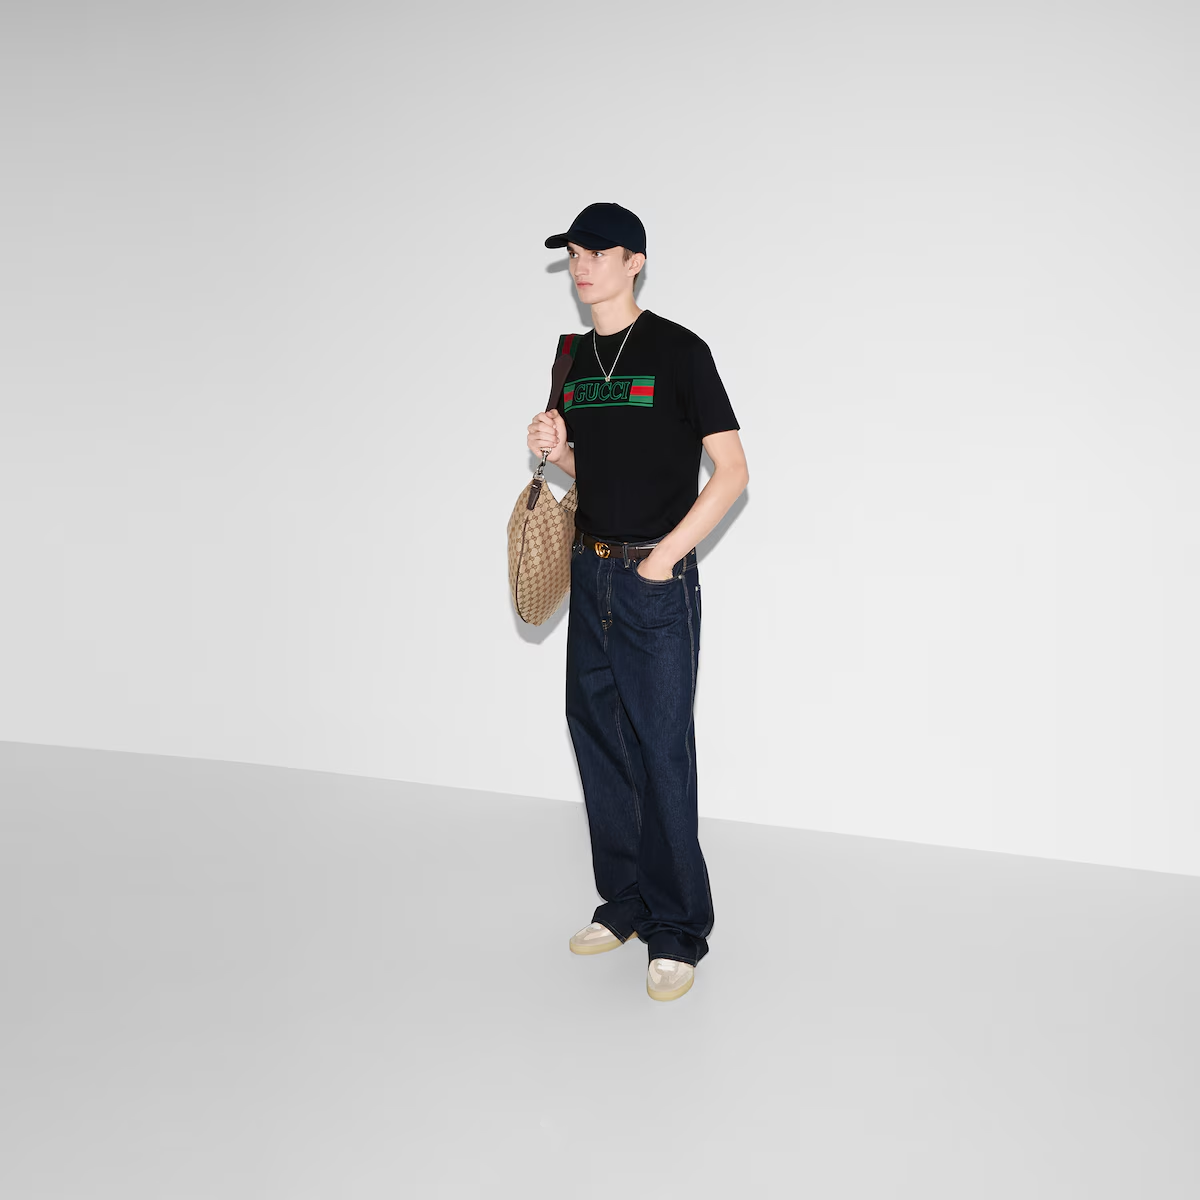

In [ ]:
# image_1 = Image.open(phase1_path/"output/17_69.png")
from google.colab import files
import pillow_avif
from PIL import Image
# Prompt to upload your image file(s) from your local machine
uploaded = files.upload()

# Assuming one image is uploaded, get its filename
file_name = list(uploaded.keys())[0]

# Open the uploaded image
img = Image.open(file_name)

img

In [ ]:
# For a single image, use run_example instead of run_examples
result = pg_model.run_example(img, "Tell me the Fashion brand/designer/logo on the outfit. Just return the name. No extra information")
print(result)

unanswerable


------------------------------

In [ ]:
from transformers import AutoProcessor, PaliGemmaForConditionalGeneration

model_id = "google/paligemma-3b-mix-224"
model = PaliGemmaForConditionalGeneration.from_pretrained(model_id)
processor = AutoProcessor.from_pretrained(model_id)

config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/62.6k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/1.74G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/699 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/40.0k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.26M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

In [ ]:
query = "<image>Tell me the Fashion brand/designer/logo on the outfit. Just return the name. No extra information"

inputs = processor(img, query, return_tensors="pt")
output = model.generate(**inputs, max_new_tokens=20)

print(processor.decode(output[0], skip_special_tokens=True)[inputs.input_ids.shape[1]: ])

KeyboardInterrupt: 

##Fashion Clip Model

In [ ]:
from PIL import Image
import requests
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("patrickjohncyh/fashion-clip")
processor = CLIPProcessor.from_pretrained("patrickjohncyh/fashion-clip")

config.json:   0%|          | 0.00/4.46k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

Saving 796395_XJG7W_7548_003_100_0000_Light-Printed-cotton-jersey-T-shirt.avif to 796395_XJG7W_7548_003_100_0000_Light-Printed-cotton-jersey-T-shirt.avif


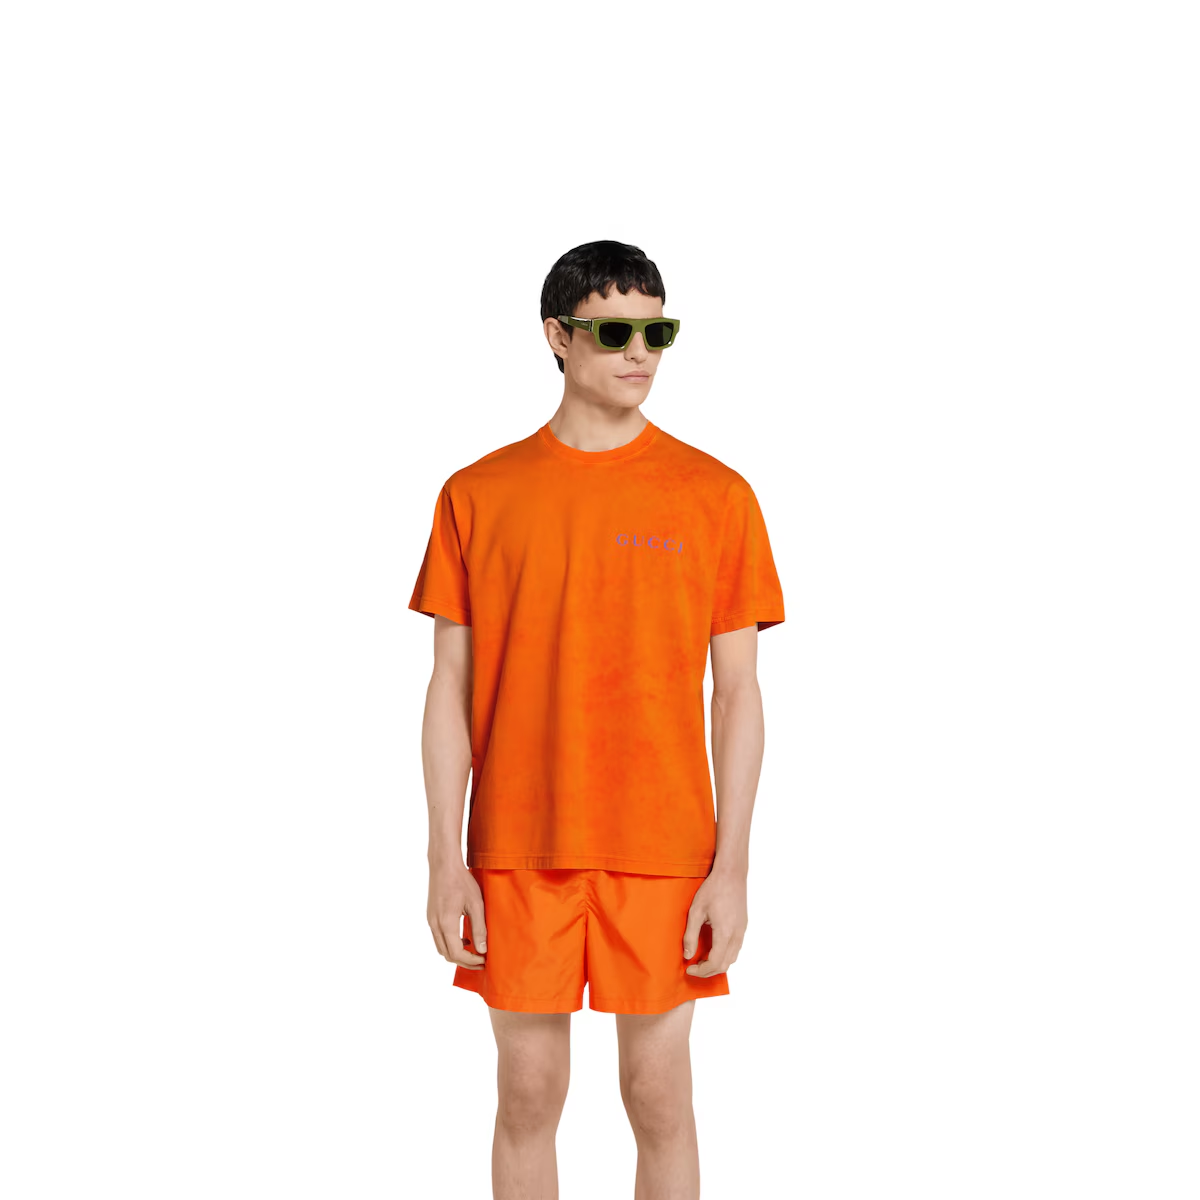

In [ ]:
# image_1 = Image.open(phase1_path/"output/17_69.png")
from google.colab import files
import pillow_avif
from PIL import Image
# Prompt to upload your image file(s) from your local machine
uploaded = files.upload()

# Assuming one image is uploaded, get its filename
file_name = list(uploaded.keys())[0]

# Open the uploaded image
img = Image.open(file_name)

img

In [ ]:
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
class FashionCLIPClassifier:
    def __init__(self, model_name="patrickjohncyh/fashion-clip"):
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.model = CLIPModel.from_pretrained(model_name).to(self.device)
        self.processor = CLIPProcessor.from_pretrained(model_name)

    def detect_brand(self, image: Image.Image, candidate_brands: list):
        # Create a list of text prompts for each candidate
        text_prompts = [f"a photo of {brand} logo" for brand in candidate_brands]
        inputs = self.processor(
            text=text_prompts,
            images=image,
            return_tensors="pt",
            padding=True
        ).to(self.device)

        with torch.no_grad():
            outputs = self.model(**inputs)

        logits = outputs.logits_per_image  # similarity scores
        probs = logits.softmax(dim=1)
        best_idx = torch.argmax(probs, dim=1).item()
        best_brand = candidate_brands[best_idx]

        # You can also define a threshold to decide if no brand is confidently detected
        threshold = 0.4  # adjust as needed
        if probs[0][best_idx] < threshold:
            best_brand = None

        return {"Designer": best_brand}

In [ ]:
fashionClip_classifier = FashionCLIPClassifier()

In [ ]:
candidate_brands = ["Louis Vuitton", "Prada", "Hermès", "Balenciaga", "Dior", "Saint Laurent",
                  "Fendi", "Burberry", "Versace", "Givenchy", "Valentino", "Dolce & Gabbana", "Armani",
                  "Bottega Veneta", "Alexander McQueen", "Celine", "Loewe", "Off-White", "Supreme", "Off-White",
                  "A Bathing Ape (BAPE)", "Palace", "Fear of God", "Kith", "Noah", "Vetements",
                  "Yeezy (formerly by Kanye West)", "Billionaire Boys Club", "Ambush", "A-Cold-Wall",
                  "Heron Preston", "Carhartt WIP", "Stone Island", "Comme des Garçons", "Undercover", "WTAPS",
                  "Neighborhood", "Nike", "Adidas", "Puma", "Under Armour", "Lululemon", "Stüssy", "Reebok", "Fila", "New Balance",
                  "ASICS", "The North Face", "Patagonia", "Columbia Sportswear", "Champion", "Athleta", "Gymshark",
                  "Sweaty Betty", "Outdoor Voices", "Salomon", "Arc'teryx", "On Running", "Zara", "H&M", "Uniqlo",
                  "Forever 21", "Gap", "Old Navy", "Gucci", "Primark", "Topshop", "ASOS", "Boohoo", "Shein", "Fashion Nova",
                  "Mango", "Pull & Bear", "Bershka", "Urban Outfitters", "American Eagle", "Hollister", "Chanel",
                  "Abercrombie & Fitch", "Cotton On", "Levi’s", "Wrangler", "Diesel", "Lee", "Guess", "Tommy Hilfiger",
                  "Calvin Klein", "Ralph Lauren", "G-Star Raw", "True Religion", "7 For All Mankind", "Lucky Brand", "AG Jeans",
                  "Citizens of Humanity", "Hudson Jeans", "Joe’s Jeans", "Paige Denim", "Nudie Jeans", "Edwin", "Re/Done"]

In [ ]:
result = fashionClip_classifier.detect_brand(img, candidate_brands)
print(result)  # Expected output: {"Designer": "Gucci"} or {"Designer": None}

{'Designer': None}


## Qwen VL

In [ ]:
!pip install qwen-vl-utils --q
!pip install -U transformers bitsandbytes accelerate --q
!pip install pillow-avif-plugin --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.7/39.7 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
from transformers import Qwen2VLForConditionalGeneration, AutoProcessor
from qwen_vl_utils import process_vision_info
import torch
from PIL import Image
import pandas as pd
import base64
from io import BytesIO

def image_to_data_url(image: Image.Image, fmt: str = None):
    if fmt is None:
        if image.format and image.format.upper() == "AVIF":
            fmt = "PNG"
        else:
            fmt = "PNG"
    if image.format and image.format.upper() == "AVIF":
        image = image.convert("RGB")
    buffer = BytesIO()
    image.save(buffer, format=fmt)
    img_str = base64.b64encode(buffer.getvalue()).decode("utf-8")
    return f"data:image/{fmt.lower()};base64,{img_str}"

class Qwen2VLModel:
    def __init__(self, model_id="Qwen/Qwen2-VL-7B-Instruct"):
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.model_id = model_id
        self.model = Qwen2VLForConditionalGeneration.from_pretrained(
            model_id,
            load_in_8bit=True,
            torch_dtype=torch.float16,
            device_map="auto",
            offload_folder="offload",      # Offload some weights to CPU
            offload_state_dict=True
        ).eval()
        self.processor = AutoProcessor.from_pretrained(model_id)

    def run_example(self, task_prompt: str, image: Image.Image, max_new_tokens=25, **kwargs):
        data_url = image_to_data_url(image)
        messages = [
            {
                "role": "user",
                "content": [
                    {"type": "image", "image_url": data_url},
                    {"type": "text", "text": task_prompt}
                ]
            }
        ]
        input_text = self.processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
        image_inputs, video_inputs = process_vision_info(messages)
        inputs = self.processor(
            text=[input_text],
            images=image_inputs,
            videos=video_inputs,
            padding=True,
            return_tensors="pt"
        ).to(self.device)

        generated_ids = self.model.generate(**inputs, max_new_tokens=max_new_tokens, **kwargs)
        generated_ids_trimmed = [
            out_ids[len(in_ids):] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
        ]
        output_text = self.processor.batch_decode(
            generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
        )
        return output_text[0].strip()

    def run_examples(self, prompts, image, repetitions=1, **kwargs):
        results = [
            {'prompt': prompt, 'answer': self.run_example(prompt, image, **kwargs)}
            for prompt in prompts for _ in range(repetitions)
        ]
        return pd.DataFrame(results)

    def get_logo_name(self, image: Image.Image):
        prompt = (
            "Detect the logo in the clothing. What is the full brand name of this logo? "
            "Only give the brand name (no special characters or extra words)"
        )
        return self.run_example(prompt, image=image)

In [ ]:
qwen_model = Qwen2VLModel()

config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/56.5k [00:00<?, ?B/s]

model-00001-of-00005.safetensors:   0%|          | 0.00/3.90G [00:00<?, ?B/s]

model-00002-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00003-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00004-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00005-of-00005.safetensors:   0%|          | 0.00/1.09G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/244 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/347 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

In [ ]:
# Assuming you've already uploaded and opened your image:
from google.colab import files
import pillow_avif  # make sure pillow_avif is installed for AVIF support
from PIL import Image

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
img = Image.open(file_name)

Saving eCom-803264TRVR61048_G.avif to eCom-803264TRVR61048_G.avif


improve the code to capture avif as well

In [ ]:
logo_name = qwen_model.get_logo_name(img)
print("Detected logo/brand:", logo_name)

OutOfMemoryError: CUDA out of memory. Tried to allocate 1.96 GiB. GPU 0 has a total capacity of 14.74 GiB of which 1.16 GiB is free. Process 10508 has 13.58 GiB memory in use. Of the allocated memory 12.99 GiB is allocated by PyTorch, and 463.39 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

##Silhouette

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload your image file

# Automatically extract the uploaded filename (assuming one file uploaded)
input_image = next(iter(uploaded))
print("Using file:", input_image)

Saving 794814_Z8BS9_4215_007_100_0000_Light-Wool-and-leather-bomber-jacket.avif to 794814_Z8BS9_4215_007_100_0000_Light-Wool-and-leather-bomber-jacket.avif
Using file: 794814_Z8BS9_4215_007_100_0000_Light-Wool-and-leather-bomber-jacket.avif


###U2NET Full Blown

In [ ]:
# Clone the U-2-Net repository
!git clone https://github.com/xuebinqin/U-2-Net.git

Cloning into 'U-2-Net'...
remote: Enumerating objects: 1077, done.
remote: Counting objects: 100% (422/422), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 1077 (delta 398), reused 380 (delta 380), pack-reused 655 (from 2)
Receiving objects: 100% (1077/1077), 66.95 MiB | 16.58 MiB/s, done.
Resolving deltas: 100% (536/536), done.


In [ ]:
!pip install huggingface_hub

from huggingface_hub import hf_hub_download

# Download the full U2NET weight file from Hugging Face.
# This file is stored using Git LFS and is approximately 176 MB.
model_path = hf_hub_download(repo_id="lilpotat/pytorch3d", filename="u2net.pth")
print("Full U2NET model downloaded to:", model_path)

u2net.pth:   0%|          | 0.00/176M [00:00<?, ?B/s]

Full U2NET model downloaded to: /root/.cache/huggingface/hub/models--lilpotat--pytorch3d/snapshots/6fc3f4663724d5416873ad9cc2876237a2d81746/u2net.pth


In [ ]:
# Install pillow-avif-plugin to enable AVIF image support
!pip install pillow-avif-plugin --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 31.2 MB/s eta 0:00:00


In [ ]:
# Clone the U-2-Net repository
!git clone https://github.com/xuebinqin/U-2-Net.git
!pip install huggingface_hub

from huggingface_hub import hf_hub_download

# Download the full U2NET weight file from Hugging Face.
# This file is stored using Git LFS and is approximately 176 MB.
model_path = hf_hub_download(repo_id="lilpotat/pytorch3d", filename="u2net.pth")
print("Full U2NET model downloaded to:", model_path)
# Install pillow-avif-plugin to enable AVIF image support
!pip install pillow-avif-plugin --q

import pillow_avif
import os
import sys
import cv2
import torch
import numpy as np
from PIL import Image
import torchvision.transforms as transforms
from torch.autograd import Variable

# Add the U-2-Net repository to the Python path
sys.path.append('./U-2-Net')

# Import the full U2NET model from the repository
from model import U2NET

# Helper function to normalize the prediction map to [0, 1]
def normPRED(d):
    ma = torch.max(d)
    mi = torch.min(d)
    dn = (d - mi) / (ma - mi)
    return dn

# Inference function: preprocess the image, run the model, and get the saliency map
def inference(model, image_path):
    # Open image; now AVIF images should be supported.
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((320, 320)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
    image_tensor = transform(image).unsqueeze(0)
    image_tensor = Variable(image_tensor)

    if torch.cuda.is_available():
        image_tensor = image_tensor.cuda()
        model = model.cuda()

    # U2NET returns 7 outputs; we use d1 as the primary saliency map.
    d1, d2, d3, d4, d5, d6, d7 = model(image_tensor)
    pred = d1[:, 0, :, :]
    pred = normPRED(pred)
    pred = pred.squeeze().cpu().data.numpy()
    return pred

# Save the binary mask image
def save_output(image_path, pred, output_name="model_silhouette.png"):
    # Re-open the image to get the original dimensions.
    image = Image.open(image_path).convert('RGB')
    image = np.array(image)
    pred = (pred * 255).astype(np.uint8)
    pred = cv2.resize(pred, (image.shape[1], image.shape[0]))
    ret, mask = cv2.threshold(pred, 127, 255, cv2.THRESH_BINARY)
    cv2.imwrite(output_name, mask)
    print("Output saved as", output_name)

# --- Main Execution ---

# 'model_path' now points to the downloaded full U2NET weight file from Hugging Face.
print("Using weight file at:", model_path)

# Instantiate the full U2NET model (3 input channels, 1 output channel)
model = U2NET(3, 1)

# Load the state dictionary from the downloaded model weight file
if torch.cuda.is_available():
    model.load_state_dict(torch.load(model_path))
else:
    model.load_state_dict(torch.load(model_path, map_location='cpu'))
model.eval()


# Run inference to get the saliency (silhouette) map
pred = inference(model, input_image)

# Create output filename based on input filename (e.g., Capture7.avif -> Capture7_silhouette.png)
basename, ext = os.path.splitext(input_image)
output_name = f"{basename}_silhouette.png"

# Save and display the output mask using the new filename
save_output(input_image, pred, output_name=output_name)
print("Saved as:", output_name)

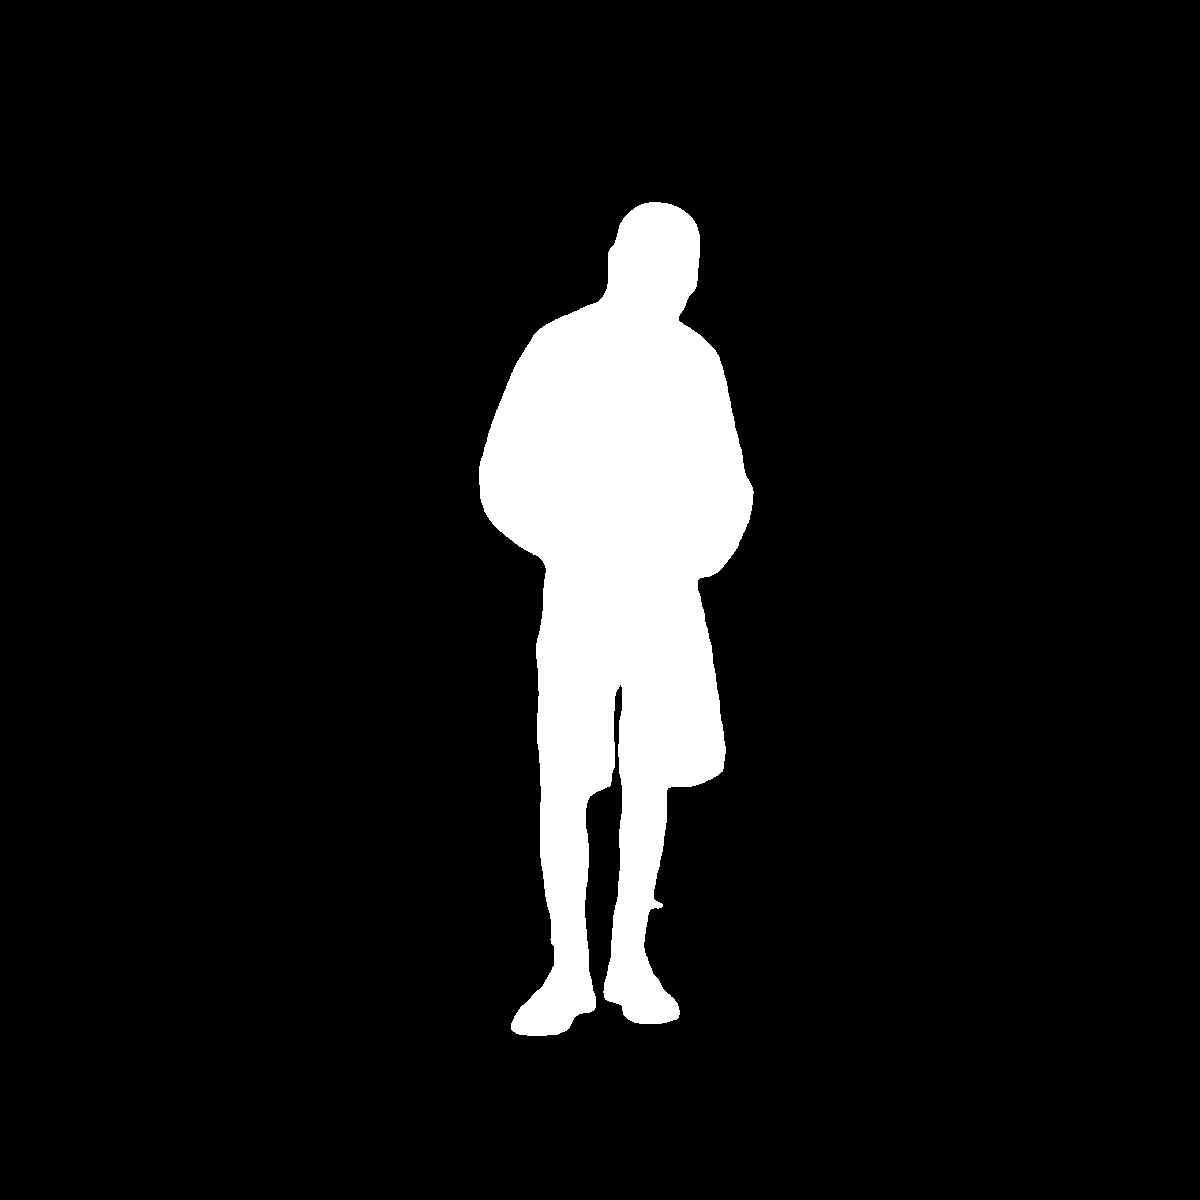

In [ ]:
from IPython.display import Image, display
display(Image(filename=output_name))

###U2NETP (Light version)

In [ ]:
# Clone the repository into your Colab environment
!git clone https://github.com/xuebinqin/U-2-Net.git

# Download the pre-trained U^2-Net model weights (u2net.pth)
# (This file is ~176MB; adjust the destination path if necessary)
!gdown --id 1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy -O ./U-2-Net/saved_models/u2net.pth


In [ ]:
import os
import sys
import cv2
import torch
import numpy as np
from PIL import Image
import torchvision.transforms as transforms
from torch.autograd import Variable

# Add the U-2-Net repository to your Python path
sys.path.append('./U-2-Net')

# Import the U2NETP model from the repository
from model import U2NETP

def normPRED(d):
    ma = torch.max(d)
    mi = torch.min(d)
    dn = (d - mi) / (ma - mi)
    return dn

def inference(model, image_path):
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((320, 320)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
    image_tensor = transform(image).unsqueeze(0)
    image_tensor = Variable(image_tensor)
    if torch.cuda.is_available():
        image_tensor = image_tensor.cuda()
        model = model.cuda()
    d1, d2, d3, d4, d5, d6, d7 = model(image_tensor)
    pred = d1[:, 0, :, :]
    pred = normPRED(pred)
    pred = pred.squeeze().cpu().data.numpy()
    return pred

def save_output(image_path, pred, output_name="output.png"):
    image = Image.open(image_path).convert('RGB')
    image = np.array(image)
    pred = (pred * 255).astype(np.uint8)
    pred = cv2.resize(pred, (image.shape[1], image.shape[0]))
    ret, mask = cv2.threshold(pred, 127, 255, cv2.THRESH_BINARY)
    cv2.imwrite(output_name, mask)
    print(f"Output saved as {output_name}")

model_path = "./U-2-Net/saved_models/u2net.pth"  # Ensure this weight file matches U2NETP

# Initialize the U2NETP model
model = U2NETP(3, 1)

if torch.cuda.is_available():
    model.load_state_dict(torch.load(model_path))
else:
    model.load_state_dict(torch.load(model_path, map_location='cpu'))
model.eval()

# input_image = "Capture7.JPG"  # Replace with your actual image filename
pred = inference(model, input_image)
save_output(input_image, pred, output_name="model_silhouette.png")


Output saved as model_silhouette.png
